In [ ]:
!pip install numpy pandas matplotlib scikit-learn keras seaborn tensorflow

In [ ]:

try:
    import tensorflow as tf
except ImportError:
    !pip install tensorflow
    import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [ ]:
fcnn = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
fcnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print("Training Fully Connected Neural Network...")
start_time = time.time()
history_fcnn = fcnn.fit(x_train_flat, y_train_cat, epochs=10, batch_size=128, validation_split=0.1, verbose=2)
fcnn_time = (time.time() - start_time) / 10
fcnn_loss, fcnn_accuracy = fcnn.evaluate(x_test_flat, y_test_cat, verbose=0)
fcnn_params = fcnn.count_params()
y_pred_fcnn = np.argmax(fcnn.predict(x_test_flat), axis=1)

Training Fully Connected Neural Network...
Epoch 1/10
422/422 - 4s - 10ms/step - accuracy: 0.9012 - loss: 0.3473 - val_accuracy: 0.9607 - val_loss: 0.1474
Epoch 2/10
422/422 - 3s - 8ms/step - accuracy: 0.9573 - loss: 0.1453 - val_accuracy: 0.9698 - val_loss: 0.1037
Epoch 3/10
422/422 - 3s - 7ms/step - accuracy: 0.9704 - loss: 0.1001 - val_accuracy: 0.9743 - val_loss: 0.0928
Epoch 4/10
422/422 - 5s - 11ms/step - accuracy: 0.9771 - loss: 0.0752 - val_accuracy: 0.9728 - val_loss: 0.0904
Epoch 5/10
422/422 - 2s - 6ms/step - accuracy: 0.9815 - loss: 0.0598 - val_accuracy: 0.9773 - val_loss: 0.0823
Epoch 6/10
422/422 - 4s - 9ms/step - accuracy: 0.9855 - loss: 0.0470 - val_accuracy: 0.9787 - val_loss: 0.0760
Epoch 7/10
422/422 - 2s - 6ms/step - accuracy: 0.9875 - loss: 0.0397 - val_accuracy: 0.9772 - val_loss: 0.0790
Epoch 8/10
422/422 - 3s - 6ms/step - accuracy: 0.9903 - loss: 0.0306 - val_accuracy: 0.9750 - val_loss: 0.1002
Epoch 9/10
422/422 - 2s - 6ms/step - accuracy: 0.9920 - loss: 0.027

In [ ]:
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print("\nTraining Convolutional Neural Network...")
start_time = time.time()
history_cnn = cnn.fit(x_train_cnn, y_train_cat, epochs=10, batch_size=128, validation_split=0.1, verbose=2)
cnn_time = (time.time() - start_time) / 10
cnn_loss, cnn_accuracy = cnn.evaluate(x_test_cnn, y_test_cat, verbose=0)
cnn_params = cnn.count_params()
y_pred_cnn = np.argmax(cnn.predict(x_test_cnn), axis=1)


Training Convolutional Neural Network...
Epoch 1/10
422/422 - 47s - 111ms/step - accuracy: 0.9417 - loss: 0.1938 - val_accuracy: 0.9830 - val_loss: 0.0618
Epoch 2/10
422/422 - 80s - 189ms/step - accuracy: 0.9842 - loss: 0.0506 - val_accuracy: 0.9878 - val_loss: 0.0408
Epoch 3/10
422/422 - 43s - 101ms/step - accuracy: 0.9895 - loss: 0.0333 - val_accuracy: 0.9852 - val_loss: 0.0429
Epoch 4/10
422/422 - 46s - 109ms/step - accuracy: 0.9919 - loss: 0.0249 - val_accuracy: 0.9895 - val_loss: 0.0349
Epoch 5/10
422/422 - 79s - 186ms/step - accuracy: 0.9948 - loss: 0.0173 - val_accuracy: 0.9878 - val_loss: 0.0453
Epoch 6/10
422/422 - 42s - 101ms/step - accuracy: 0.9955 - loss: 0.0144 - val_accuracy: 0.9887 - val_loss: 0.0402
Epoch 7/10
422/422 - 43s - 101ms/step - accuracy: 0.9964 - loss: 0.0109 - val_accuracy: 0.9897 - val_loss: 0.0413
Epoch 8/10
422/422 - 45s - 105ms/step - accuracy: 0.9970 - loss: 0.0084 - val_accuracy: 0.9885 - val_loss: 0.0478
Epoch 9/10
422/422 - 82s - 195ms/step - accura

In [ ]:
print("\n=== Model Comparison ===")
print(f"FCNN Accuracy:     {fcnn_accuracy * 100:.2f}%")
print(f"CNN Accuracy:      {cnn_accuracy * 100:.2f}%")
print(f"FCNN Time/Epoch:   {fcnn_time:.2f} sec")
print(f"CNN Time/Epoch:    {cnn_time:.2f} sec")
print(f"FCNN Parameters:   {fcnn_params}")
print(f"CNN Parameters:    {cnn_params}")


=== Model Comparison ===
FCNN Accuracy:     97.51%
CNN Accuracy:      98.86%
FCNN Time/Epoch:   3.15 sec
CNN Time/Epoch:    62.48 sec
FCNN Parameters:   109386
CNN Parameters:    515146


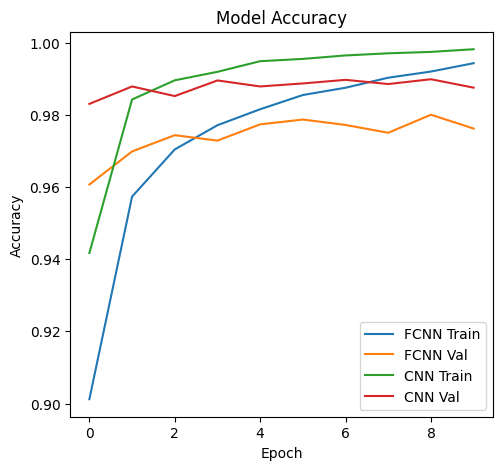

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_fcnn.history['accuracy'], label='FCNN Train')
plt.plot(history_fcnn.history['val_accuracy'], label='FCNN Val')
plt.plot(history_cnn.history['accuracy'], label='CNN Train')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

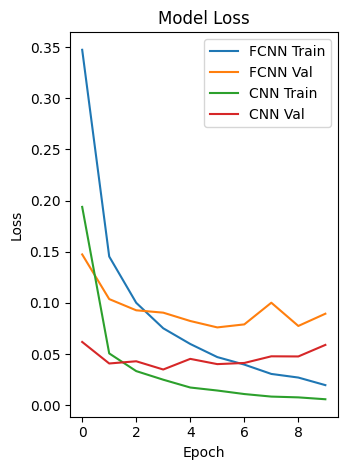

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history_fcnn.history['loss'], label='FCNN Train')
plt.plot(history_fcnn.history['val_loss'], label='FCNN Val')
plt.plot(history_cnn.history['loss'], label='CNN Train')
plt.plot(history_cnn.history['val_loss'], label='CNN Val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

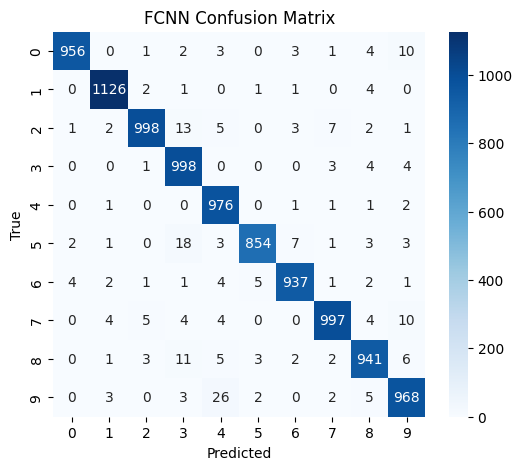

In [ ]:
cm_fcnn = confusion_matrix(y_test, y_pred_fcnn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_fcnn, annot=True, fmt='d', cmap='Blues')
plt.title("FCNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

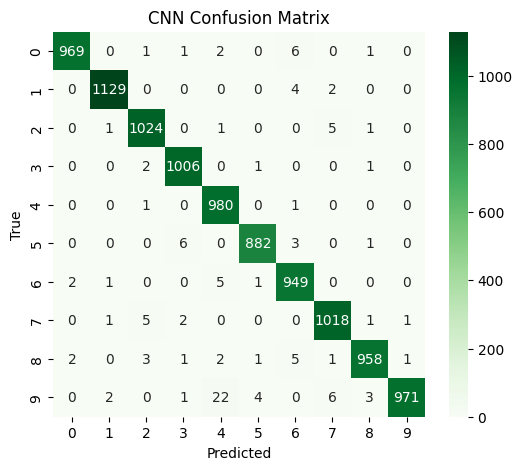

In [ ]:
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Greens')
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
print("Last Epoch:")
print(f"Train Accuracy:      {history_cnn.history['accuracy'][-1]*100:.2f}%")
print(f"Val Accuracy:        {history_cnn.history['val_accuracy'][-1]*100:.2f}%")

Last Epoch:
Train Accuracy:      99.81%
Val Accuracy:        98.75%


In [ ]:
num_images = 25
predictions = cnn.predict(x_test_cnn[:num_images])
predicted_labels = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


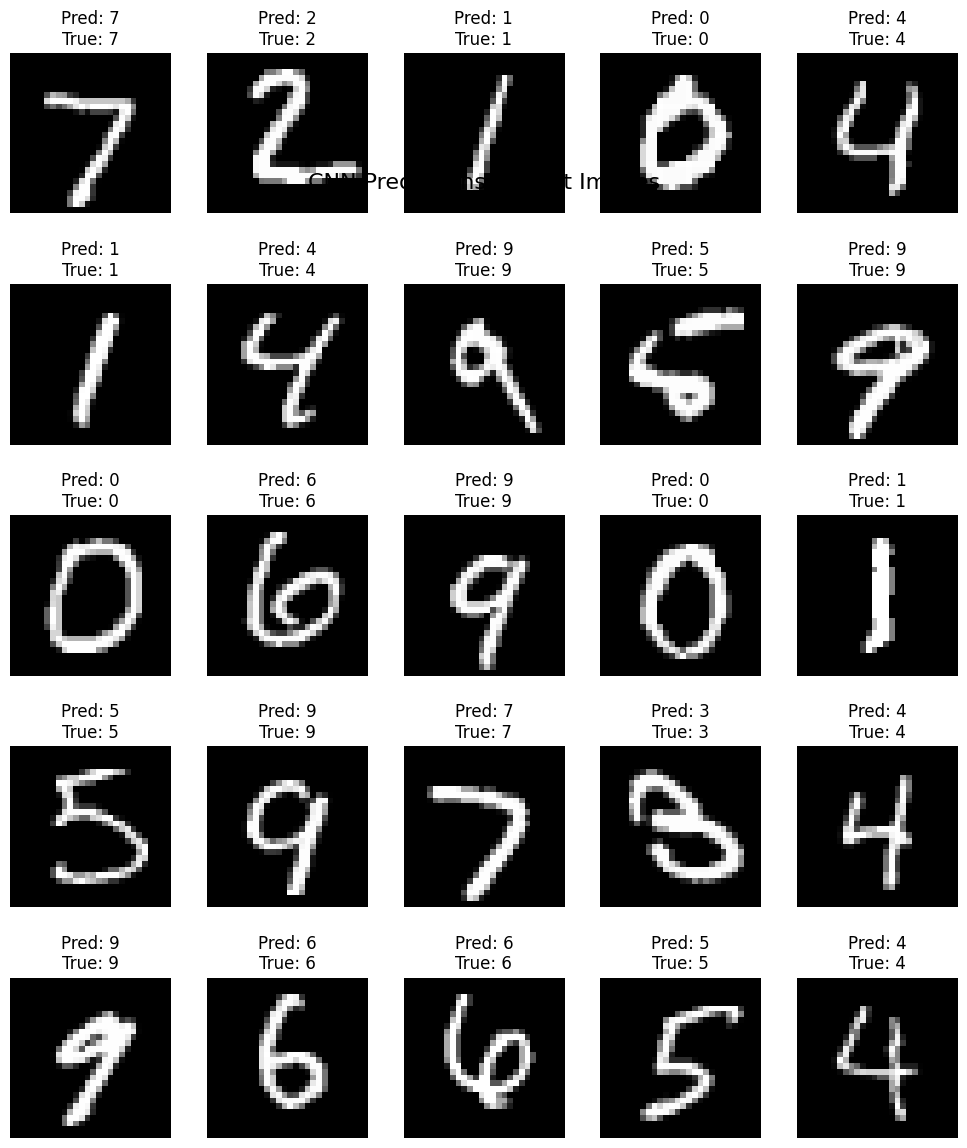

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.suptitle("CNN Predictions on Test Images", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=1.1)
plt.show()